<a href="https://colab.research.google.com/github/Moriarty12138/nlp-demos/blob/main/hr_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**员工离职分析**

In [1]:
from pandas.core.arrays.sparse import array
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn import preprocessing
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', None)
import matplotlib
import matplotlib.pyplot as plt
# plt.rcParams['front.sans-self'] = ['SimHei'] # 解决中文乱码
# plt.rc('figure', figsize=(10, 6)) # 设置图像大小
import seaborn as sns
import math
import statsmodels.api as sm
# from numpy import corrcoef.array
from statsmodels.formula.api import ols
# matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IBM员工离职.csv')  # 读取数据

In [3]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
# 表名
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**各个字段含义**

Age 年龄  
Attrition 当前员工状态，Yes为离职，No为在职  
BusinessTravel  
DailyRate 每日投入率  
Department 部门  
DistanceFromHome 离家距离  
Education  
EducationField  
EmployeeCount  
EmployeeNumber  
EnvironmentStatisfaction 环境满意度  
Gender  
HourlyRate  
JobInvolvment  
JobLevel  
JobRole  
JobSatisfaction 工作满意度  
MaritalStatus  
MonthlyIncome  
MonthlyRate  
NumCompaniesWorked  
Over18  
OverTime  
PercentSalaryHike  
PerformanceRating  
RelationshipSatisfaction 关系满意度  
StandardHours  
StockOptionLevel  
TotalWorkingYears  
WorkLifeBalance  
YearsAtCompany  
YearsInCurrentRole  
YearsSinceLastPromotion  
YearsWithCurrManager 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# 离职员工人数
sum(df['Attrition']=='Yes')

237

In [9]:
# 在职员工人数
sum(df['Attrition']=='No')

1233

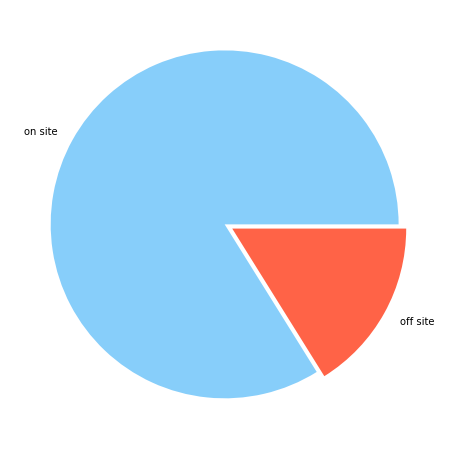

In [10]:
# 离职、在职员工饼图
plt.figure(figsize=(18, 8))
labels = ['on site', 'off site']
# fraces = [84, 16]
# 在职、离职员工数量
fraces = [sum(df['Attrition']=='No'), sum(df['Attrition']=='Yes')]
explode = (0, 0.05)
colors = ['lightskyblue', 'tomato']
plt.pie(x=fraces, labels=labels, explode=explode, colors=colors)
plt.show()

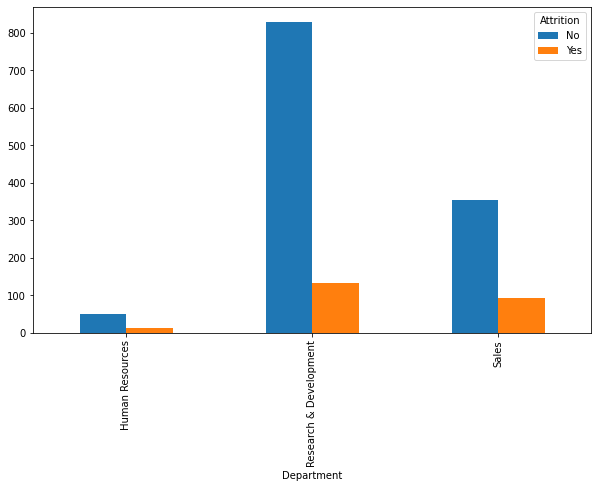

In [11]:
# 各部门员工状态柱状图
fig = plt.figure(figsize=[10,6])
ax1 = fig.add_subplot(1, 1, 1)
df1 = pd.crosstab(df['Department'], df['Attrition'])
df1.plot(kind='bar', ax=ax1)

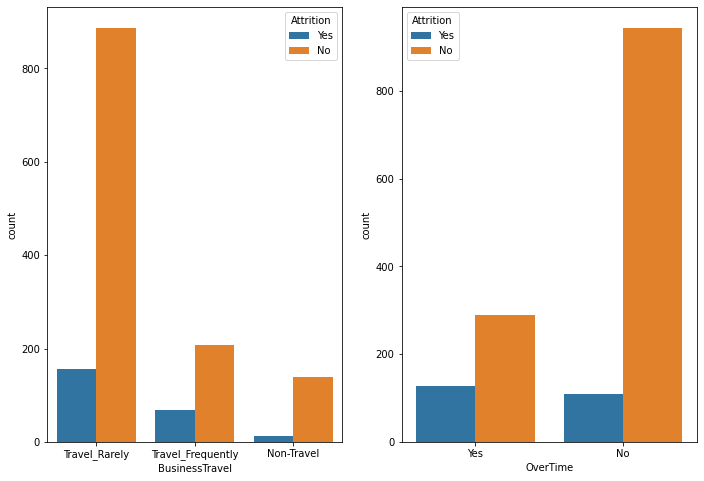

In [12]:
# 差旅和加班情况柱状图
plt.figure(figsize=(18, 8))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df, ax=plt.subplot(131))
sns.countplot(x='OverTime', hue='Attrition', data=df, ax=plt.subplot(132))

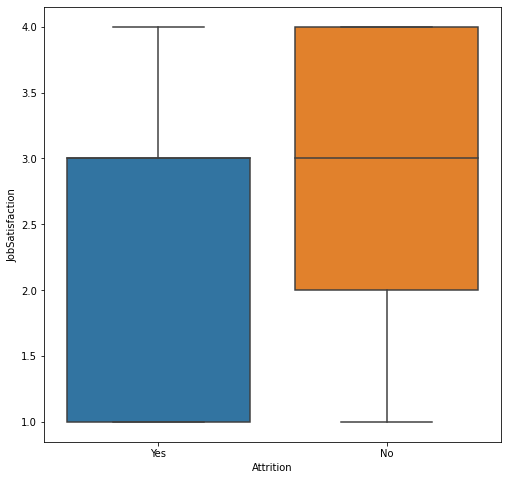

In [13]:
# 工作满意度分析
plt.figure(figsize=(18, 8))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df, ax=plt.subplot(121))

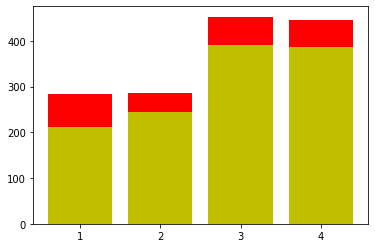

In [14]:
# 环境满意度对员工离职影响柱状图
# 环境满意度总共分为4种：1、2、3、4
x = [1, 2]
df_on_site = df[df['Attrition']=='No']
df_off_site = df[df['Attrition']=='Yes']
on_site_sat_num = [sum(df_on_site['EnvironmentSatisfaction']==1), sum(df_on_site['EnvironmentSatisfaction']==2), sum(df_on_site['EnvironmentSatisfaction']==3), sum(df_on_site['EnvironmentSatisfaction']==4)]
off_site_sat_num = [sum(df_off_site['EnvironmentSatisfaction']==1), sum(df_off_site['EnvironmentSatisfaction']==2), sum(df_off_site['EnvironmentSatisfaction']==3), sum(df_off_site['EnvironmentSatisfaction']==4)]
sat_num = ['1', '2', '3', '4']
y_on_site = np.array(on_site_sat_num)
y_off_site = np.array(off_site_sat_num)
plt.bar(range(4), on_site_sat_num, label='on site', fc='y')
plt.bar(range(4), off_site_sat_num, bottom=on_site_sat_num, label='off site', tick_label=sat_num, fc='r')
plt.show()


In [15]:
# 关系满意度对员工离职影响柱状图
# 关系满意度人数
RS1 = np.sum(df['RelationshipSatisfaction']==1)
RS2 = np.sum(df['RelationshipSatisfaction']==2)
RS3 = np.sum(df['RelationshipSatisfaction']==3)
RS4 = np.sum(df['RelationshipSatisfaction']==4)
y1 = [RS1, RS2, RS3, RS4]
y1

[276, 303, 459, 432]

In [16]:
# 不同关系满意度离职人数
df_rs1 = df[df['RelationshipSatisfaction']==1]
df_rs2 = df[df['RelationshipSatisfaction']==2]
df_rs3 = df[df['RelationshipSatisfaction']==3]
df_rs4 = df[df['RelationshipSatisfaction']==4]
RS1_off = np.sum(df_rs1['Attrition']=='Yes')
RS2_off = np.sum(df_rs2['Attrition']=='Yes')
RS3_off = np.sum(df_rs3['Attrition']=='Yes')
RS4_off = np.sum(df_rs4['Attrition']=='Yes')
y2 = [RS1_off, RS2_off, RS3_off, RS4_off]
y2

[57, 45, 71, 64]

In [17]:
# 不同关系满意度在职人数
RS1_on = np.sum(df_rs1['Attrition']=='No')
RS2_on = np.sum(df_rs2['Attrition']=='No')
RS3_on = np.sum(df_rs3['Attrition']=='No')
RS4_on = np.sum(df_rs4['Attrition']=='No')
y3 = [RS1_on, RS2_on, RS3_on, RS4_on]

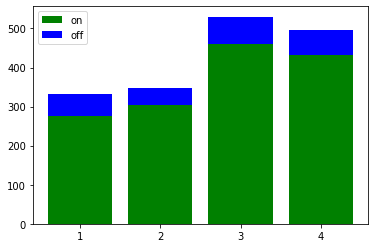

In [18]:
# 柱状图
x = [1, 2]
# y1 = np.array(y1)
# y2 = np.array(y2)
name_list = ['1', '2', '3', '4']
plt.bar(range(4), y1, label='on', fc='g')
plt.bar(range(4), y2, bottom=y1, label='off', tick_label=name_list, fc='b')
plt.legend()
plt.show()

In [19]:
# 工作与生活平衡程度柱状图
WLB1 = np.sum(df['WorkLifeBalance']==1)
WLB2 = np.sum(df['WorkLifeBalance']==2)
WLB3 = np.sum(df['WorkLifeBalance']==3)
WLB4 = np.sum(df['WorkLifeBalance']==4)
y1 = [WLB1, WLB2, WLB3, WLB4]

df_wlb1 = df[df['WorkLifeBalance']==1]
df_wlb2 = df[df['WorkLifeBalance']==2]
df_wlb3 = df[df['WorkLifeBalance']==3]
df_wlb4 = df[df['WorkLifeBalance']==4]
WLB1_off = np.sum(df_wlb1['Attrition']=='Yes')
WLB2_off = np.sum(df_wlb2['Attrition']=='Yes')
WLB3_off = np.sum(df_wlb3['Attrition']=='Yes')
WLB4_off = np.sum(df_wlb4['Attrition']=='Yes')
y2 = [WLB1_off, WLB2_off, WLB3_off, WLB4_off]

WLB1_on = np.sum(df_wlb1['Attrition']=='No')
WLB2_on = np.sum(df_wlb2['Attrition']=='No')
WLB3_on = np.sum(df_wlb3['Attrition']=='No')
WLB4_on = np.sum(df_wlb4['Attrition']=='No')
y3 = [WLB1_on, WLB2_on, WLB3_on, WLB4_on]

# 员工离职率
y1, y2, y3, np.array(y2) / np.array(y1)

([80, 344, 893, 153],
 [25, 58, 127, 27],
 [55, 286, 766, 126],
 array([0.3125    , 0.16860465, 0.14221725, 0.17647059]))

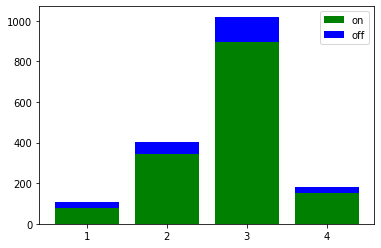

In [20]:
# 柱状图
x = [1, 2]
name_list = ['1', '2', '3', '4']
plt.bar(range(4), y1, label='on', fc='g')
plt.bar(range(4), y2, bottom=y1, label='off', tick_label=name_list, fc='b')
plt.legend()
plt.show()

In [21]:
# 培训次数与离职率关系饼图
TTLY0 = np.sum(df['TrainingTimesLastYear']==0)
TTLY1 = np.sum(df['TrainingTimesLastYear']==1)
TTLY2 = np.sum(df['TrainingTimesLastYear']==2)
TTLY3 = np.sum(df['TrainingTimesLastYear']==3)
TTLY4 = np.sum(df['TrainingTimesLastYear']==4)
TTLY5 = np.sum(df['TrainingTimesLastYear']==5)
TTLY6 = np.sum(df['TrainingTimesLastYear']==6)
y1 = [TTLY0, TTLY1, TTLY2, TTLY3, TTLY4, TTLY5, TTLY6]

df_ttly0 = df[df['TrainingTimesLastYear']==0]
df_ttly1 = df[df['TrainingTimesLastYear']==1]
df_ttly2 = df[df['TrainingTimesLastYear']==2]
df_ttly3 = df[df['TrainingTimesLastYear']==3]
df_ttly4 = df[df['TrainingTimesLastYear']==4]
df_ttly5 = df[df['TrainingTimesLastYear']==5]
df_ttly6 = df[df['TrainingTimesLastYear']==6]

TTLY0_off = np.sum(df_ttly0['Attrition']=='Yes')
TTLY1_off = np.sum(df_ttly1['Attrition']=='Yes')
TTLY2_off = np.sum(df_ttly2['Attrition']=='Yes')
TTLY3_off = np.sum(df_ttly3['Attrition']=='Yes')
TTLY4_off = np.sum(df_ttly4['Attrition']=='Yes')
TTLY5_off = np.sum(df_ttly5['Attrition']=='Yes')
TTLY6_off = np.sum(df_ttly6['Attrition']=='Yes')
y2 = [TTLY0_off, TTLY1_off, TTLY2_off, TTLY3_off, TTLY4_off, TTLY5_off, TTLY6_off]

TTLY0_on = np.sum(df_ttly0['Attrition']=='No')
TTLY1_on = np.sum(df_ttly1['Attrition']=='No')
TTLY2_on = np.sum(df_ttly2['Attrition']=='No')
TTLY3_on = np.sum(df_ttly3['Attrition']=='No')
TTLY4_on = np.sum(df_ttly4['Attrition']=='No')
TTLY5_on = np.sum(df_ttly5['Attrition']=='No')
TTLY6_on = np.sum(df_ttly6['Attrition']=='No')
y3 = [TTLY0_on, TTLY1_on, TTLY2_on, TTLY3_on, TTLY4_on, TTLY5_on, TTLY6_on]
y1, y2, y3

([54, 71, 547, 491, 123, 119, 65],
 [15, 9, 98, 69, 26, 14, 6],
 [39, 62, 449, 422, 97, 105, 59])

([<matplotlib.patches.Wedge at 0x7f80f2b85d90>,
 [Text(1.0783271030344586, 0.21728013913220962, '0'),
  Text(0.956252302769501, 0.5436741059201059, '1'),
  Text(-0.42068287862933046, 1.102463566576302, '2'),
  Text(-0.6034594502119109, -0.9553725409231407, '3'),
  Text(0.7052029580792443, -0.8442089717103721, '4'),
  Text(1.0353141298331137, -0.37165125126643006, '5'),
  Text(1.096522719672932, -0.08739522436081384, '6')])

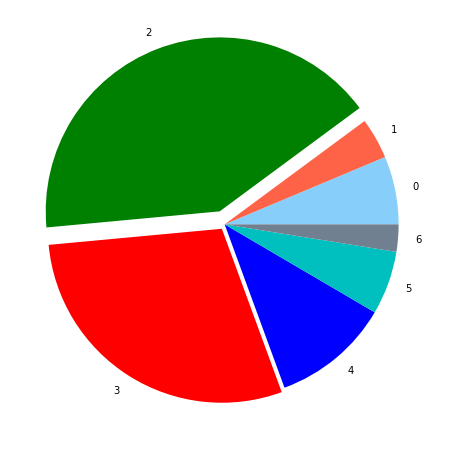

In [22]:
# 饼图
plt.figure(figsize=(18, 8))
labels = ['0', '1', '2', '3', '4', '5', '6']
fraces = y2
explode = (0, 0, 0.08, 0.03, 0, 0, 0)
colors = ['lightskyblue', 'tomato', 'green', 'red', 'blue', 'c', 'slategrey']
plt.pie(x=fraces, labels=labels, explode=explode, colors=colors)

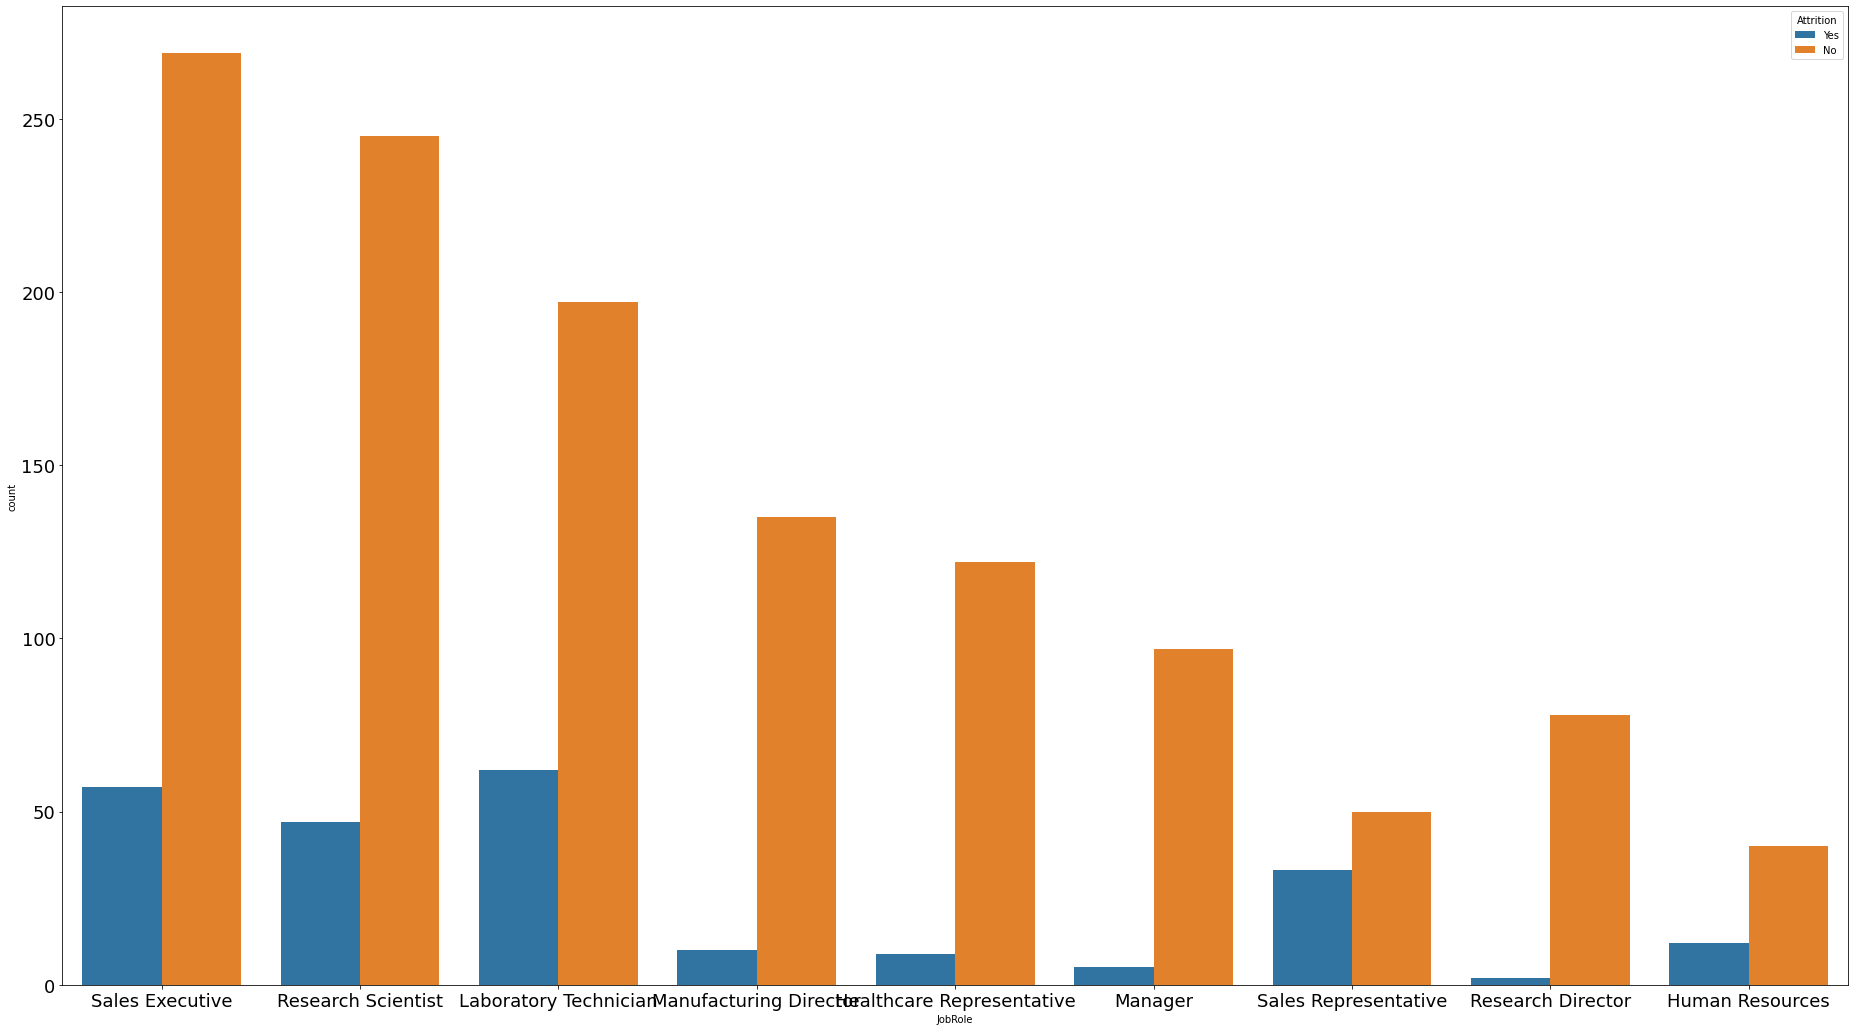

In [23]:
# 工作角色
plt.figure(figsize=(32, 18))
sns.countplot(x='JobRole', hue='Attrition', data=df, ax=plt.subplot(111))
plt.tick_params(labelsize=18)

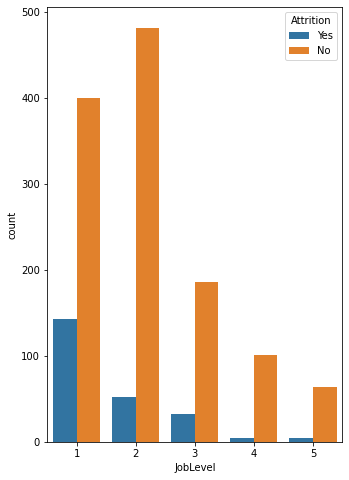

In [24]:
# 职位等级分析
plt.figure(figsize=(18, 8))
sns.countplot(x='JobLevel', hue='Attrition', data=df, ax=plt.subplot(131))

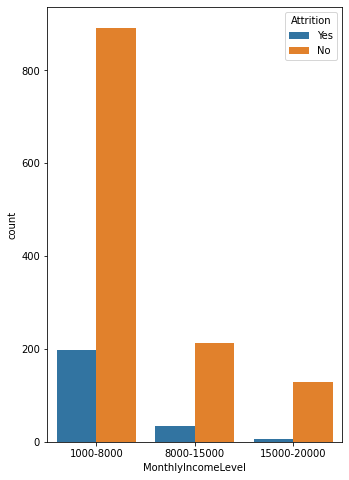

In [25]:
# 收入等级分析
def MonthlyIncomeLevel(n):
    if 1000 <= n < 8000:
        return "1000-8000"
    if 8000 <= n < 15000:
        return "8000-15000"
    if 15000 <= n <= 20000:
        return "15000-20000"

df['MonthlyIncomeLevel'] = df['MonthlyIncome'].apply(MonthlyIncomeLevel)
# 职位等级分析
plt.figure(figsize=(18, 8))
sns.countplot(x='MonthlyIncomeLevel', hue='Attrition', data=df, ax=plt.subplot(131))

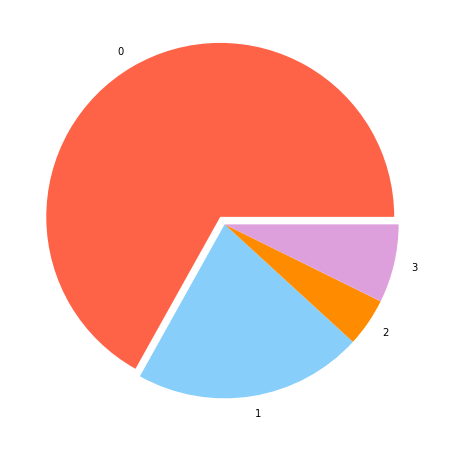

In [26]:
# 股票期权水平离职人数图  TODO: 使用真实数据修改饼图显示
plt.figure(figsize=(18, 8))
labels = ['0', '1', '2', '3']
fraces = [66.9, 21.3, 4.5, 7.3]
explode = (0.05, 0, 0, 0)
colors = ['tomato', 'lightskyblue', 'darkorange', 'plum']
plt.pie(x=fraces, labels=labels, explode=explode, colors=colors)
plt.show()

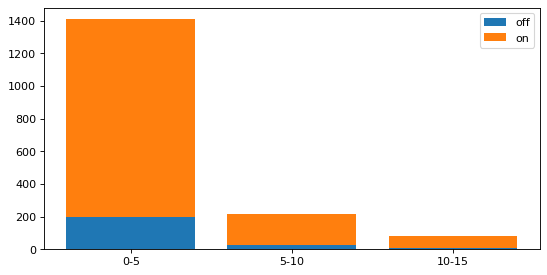

In [27]:
# 距离上次升职时长
df_yslp0 = df[(df['YearsSinceLastPromotion']<5) & (df['YearsSinceLastPromotion']>=0)]
df_yslp1 = df[(df['YearsSinceLastPromotion']<10) & (df['YearsSinceLastPromotion']>=5)]
df_yslp2 = df[(df['YearsSinceLastPromotion']<=15) & (df['YearsSinceLastPromotion']>=10)]

YSLP0_off = np.sum(df_yslp0['Attrition']=='Yes')
YSLP1_off = np.sum(df_yslp1['Attrition']=='Yes')
YSLP2_off = np.sum(df_yslp2['Attrition']=='Yes')
y2 = [YSLP0_off, YSLP1_off, YSLP2_off]

YSLP0_on = np.sum(df_yslp0['Attrition']=='No')
YSLP1_on = np.sum(df_yslp1['Attrition']=='No')
YSLP2_on = np.sum(df_yslp2['Attrition']=='No')
y3 = [YSLP0_on, YSLP1_on, YSLP2_on]
y1 = [y2[0]+y3[0], y2[1]+y3[1], y2[2]+y3[2]]
# y1, y2, y3
labels = ['0-5', '5-10', '10-15']
fig, ax = plt.subplots(figsize=(8, 4), dpi=80)
ax.bar(range(3), y2, tick_label=labels, label='off')
ax.bar(range(3), y1, bottom=y2, tick_label=labels, label='on')
ax.legend()
plt.show()

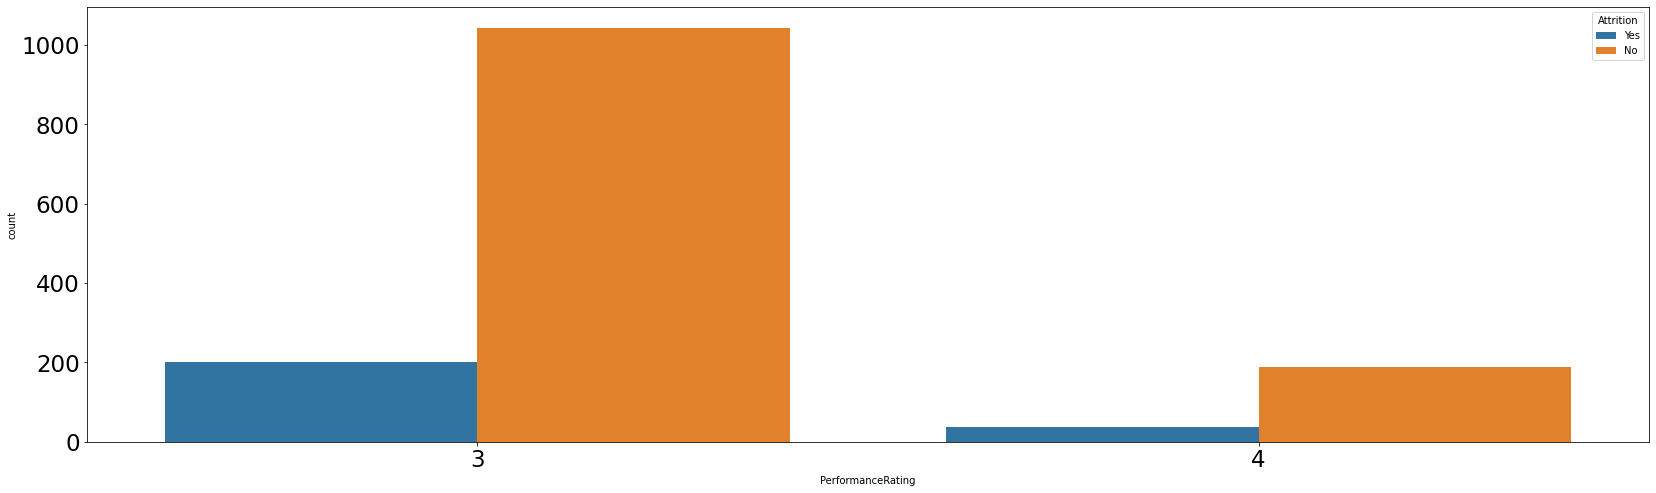

In [28]:
# 绩效评分
plt.figure(figsize=(28, 8))
sns.countplot(x='PerformanceRating', hue='Attrition', data=df, ax=plt.subplot(111))
plt.tick_params(labelsize=23)

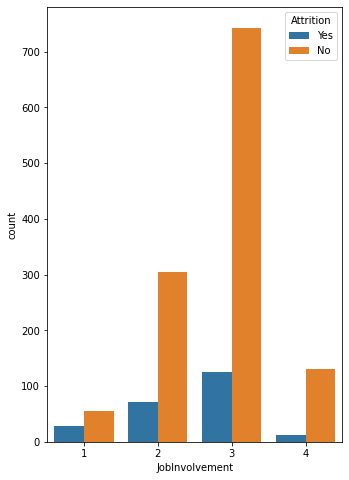

In [29]:
# 工作参与度
plt.figure(figsize=(18, 8))
sns.countplot(x='JobInvolvement', hue='Attrition', data=df, ax=plt.subplot(131))

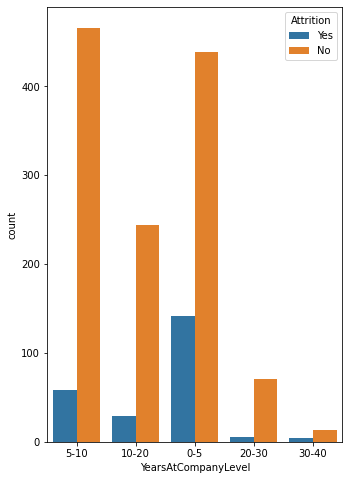

In [30]:
# 当前在公司工作年数
def YearsAtCompanyLevel(n):
    if 0 <= n < 5:
        return "0-5"
    if 5 <= n < 10:
        return "5-10"
    if 10 <= n < 20:
        return "10-20"
    if 20 <= n < 30:
        return "20-30"
    if 30 <= n <= 40:
        return "30-40"

df['YearsAtCompanyLevel'] = df['YearsAtCompany'].apply(YearsAtCompanyLevel)
plt.figure(figsize=(18, 8))
sns.countplot(x='YearsAtCompanyLevel', hue='Attrition', data=df, ax=plt.subplot(131))

Text(0, 0.5, 'num of off site')

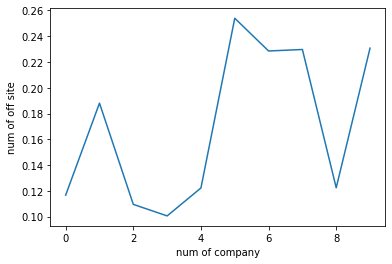

In [31]:
# 员工工作过的公司
x = [x for x in range(10)]
y = [0 for x in range(10)]
y_ = [0 for x in range(10)]

for idx, row in df.iterrows():
    y_[row['NumCompaniesWorked']] += 1
    if row['Attrition'] == 'Yes':
        y[row['NumCompaniesWorked']] += 1

y = [yy / yy_ for yy, yy_ in zip(y, y_)]
plt.figure()
plt.plot(x, y)
plt.xlabel('num of company')
plt.ylabel('num of off site')
# plt.title("员工工作过的的公司数量与离职的关系折线图")

Text(0, 0.5, 'num of off site')

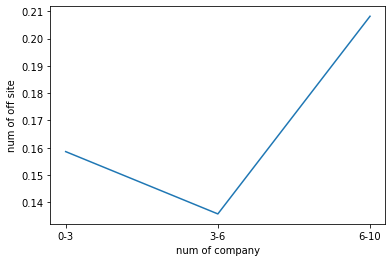

In [32]:
# zhihu上的分析
x = ['0-3', '3-6', '6-10']
y = [0, 0, 0]
y_ = [0, 0, 0]
for idx, row in df.iterrows():
    if 0 <= row['NumCompaniesWorked'] < 3:
        y_[0] += 1
        if row['Attrition'] == 'Yes':
            y[0] += 1
    if 3 <= row['NumCompaniesWorked'] < 6:
        y_[1] += 1
        if row['Attrition'] == 'Yes':
            y[1] += 1
    if 6 <= row['NumCompaniesWorked'] < 10:
        y_[2] += 1
        if row['Attrition'] == 'Yes':
            y[2] += 1

y = [yy / yy_ for yy, yy_ in zip(y, y_)]
plt.figure()
plt.plot(x, y)
plt.xlabel('num of company')
plt.ylabel('num of off site')